# **Motivating PCA**


---

\
The goal of PCA is to extract information while reducing the number of features
from a dataset by identifying which existing features relate to another. The crux of the algorithm is trying to determine the relationship between existing features, called principal components, and then quantifying how relevant these principal components are. The principal components are used to transform the high dimensional data to a lower dimensional data while preserving as much information. For a principal component to be relevant, it needs to capture information about the features. We can determine the relationships between features using covariance.

In [ ]:
#import necessary package i.e numpy

import numpy as np

In [ ]:

data = np.array([
    [   1,   2,  -1,   4,  10],
    [   3,  -3,  -3,  12, -15],
    [   2,   1,  -2,   4,   5],
    [   5,   1,  -5,  10,   5],
    [   2,   3,  -3,   5,  12],
    [   4,   0,  -3,  16,   2],
])

## Step 1: Standardize the Data along the Features

---



---





> 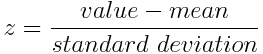



---




Explain why we need to handle the data on the same scale.


**[Answer:-]**

Standardizing or normalizing the data is an essential preprocessing step when performing PCA because PCA is sensitive to the scale of the features. PCA assumes that all features are equally important in describing the variance within the data. Standardization ensures that each feature contributes equally to the analysis by giving them all the same weight. This means PCA will not be biased toward features with larger scales.

Also, the eigenvalues of the covariance matrix represent the variances in the data along the principal components. Standardization makes these eigenvalues directly interpretable as the amount of variance explained by each principal component.

In [42]:
mean = np.mean(data, axis=0)
stddev = np.std(data, axis=0)
standardized_data = (data - mean) / stddev

print(standardized_data)

[[-1.36438208  0.70710678  1.5109662  -0.99186978  0.77802924]
 [ 0.12403473 -1.94454365 -0.13736056  0.77145428 -2.06841919]
 [-0.62017367  0.1767767   0.68680282 -0.99186978  0.20873955]
 [ 1.61245155  0.1767767  -1.78568733  0.33062326  0.20873955]
 [-0.62017367  1.23743687 -0.13736056 -0.77145428  1.00574511]
 [ 0.86824314 -0.35355339 -0.13736056  1.65311631 -0.13283426]]


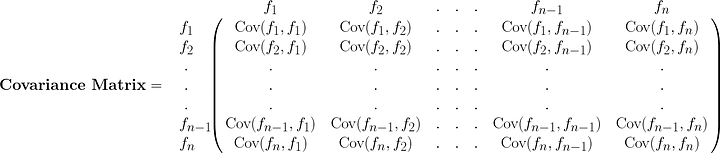

we use the pairwise covariance of the different features to determine how they relate to each other. With these covariances, our goal is to group / cluster based on similar patterns. Intuitively, we can relate features if they have similar covariances with other features.

## Step 2: Calculate the Covariance Matrix

---
using numpy with arguments (ddof =0, rowvar = False)


In [ ]:
cov_matrix = np.cov(standardized_data, ddof=0, rowvar=False)

print(cov_matrix)

[[ 1.         -0.35082321 -0.9029865   0.75182742 -0.30833773]
 [-0.35082321  1.          0.16997503 -0.64291136  0.98959863]
 [-0.9029865   0.16997503  1.         -0.49956057  0.18506849]
 [ 0.75182742 -0.64291136 -0.49956057  1.         -0.58348328]
 [-0.30833773  0.98959863  0.18506849 -0.58348328  1.        ]]


## Step 3: Eigendecomposition on the Covariance Matrix

Hint:  [Using numpy](https://https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

In [47]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(f'eigenvalues: \n{eigenvalues} \n\neigenvectors: \n{eigenvectors}')

eigenvalues: 
[3.17488134e+00 1.44713013e+00 4.12109190e-02 3.95157890e-05
 3.36738100e-01] 

eigenvectors:
[[-0.4640131   0.45182808 -0.70733581  0.28128049 -0.03317471]
 [ 0.45019005  0.48800851  0.29051532  0.6706731  -0.15803498]
 [ 0.37929082 -0.55665017 -0.48462321  0.24186072 -0.5029143 ]
 [-0.4976889   0.03162214  0.36999674 -0.03373724 -0.78311558]
 [ 0.43642295  0.49682965 -0.20861365 -0.64143906 -0.32822489]]


## Step 4: Sort the Principal Components


In [ ]:
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list

order_of_importance = np.argsort(eigenvalues)[::-1]
print ('The order of importance is :\n {}'.format(order_of_importance))

# utilize the sort order to sort eigenvalues and eigenvectors

sorted_eigenvalues = eigenvalues[order_of_importance]
print('\n\n Sorted eigen values:\n{}'.format(sorted_eigenvalues))

sorted_eigenvectors = eigenvectors[:, order_of_importance] # sort the columns
print('\n\n The sorted eigen vector matrix is: \n {}'.format(sorted_eigenvectors))

The order of importance is :
 [0 1 4 2 3]


 Sorted eigen values:
[3.17488134e+00 1.44713013e+00 3.36738100e-01 4.12109190e-02
 3.95157890e-05]


 The sorted eigen vector matrix is: 
 [[-0.4640131   0.45182808 -0.03317471 -0.70733581  0.28128049]
 [ 0.45019005  0.48800851 -0.15803498  0.29051532  0.6706731 ]
 [ 0.37929082 -0.55665017 -0.5029143  -0.48462321  0.24186072]
 [-0.4976889   0.03162214 -0.78311558  0.36999674 -0.03373724]
 [ 0.43642295  0.49682965 -0.32822489 -0.20861365 -0.64143906]]


[**Question**]

1. Why do we order eigen values and eigen vectors?

[**Answer**]

We order eigenvalues and eigenvectors because it determines the importance of each principal component.
The eigenvalues represent the amount of variance explained by each principal component and the eigenvectors represent the directions in which the data varies the most.

By sorting/ordering the eigenvalues in decreasing order, we can identify the principal components that explain the most variance in the data. We can then use these principal components to reduce the dimensionality of the data without losing too much information.

Additionally, ordering eigenvalues helps in identifying redundant or less important components. Eigenvalues close to zero indicate that the corresponding components explain very little variance and can often be omitted.

----

[**Question**]

2. Is it true we would consider the lowest eigen value compared to the highest? Defend your answer

[**Answer**]

No.

PCA is designed to prioritize the principal components associated with the highest eigenvalues because they capture the most variance and, therefore, the most important patterns in the data. The lowest eigenvalues, in contrast, represent noise or less significant variations in the data and are usually discarded to achieve effective dimensionality reduction.

----

You want to see what percentage of information each eigen value holds. You would have to print out the percentage of each eigen value using the formula:-



> (sorted eigen values / sum of all sorted eigen values) * 100



In [ ]:
# use sorted_eigenvalues to ensure the explained variances correspond to the eigenvectors

explained_variance = (sorted_eigenvalues / np.sum(sorted_eigenvalues)) * 100
explained_variance =["{:.2f}%".format(value) for value in explained_variance]

print( explained_variance)

['63.50%', '28.94%', '6.73%', '0.82%', '0.00%']


### Initialize no. of Principle Components then perfrom Matrix multiplication with the variable K

example k = 3; for 3 principle components




> The reulting matrix (with reduced data) = standardized data * vector with columns k

See expected output for k = 2



In [ ]:
k = 2 # select the number of principal components

reduced_data = np.matmul(standardized_data, sorted_eigenvectors[:, :k]) # transform the original data

In [ ]:
print(reduced_data)

[[ 2.3577116  -0.75728867]
 [-2.27171739 -1.81970663]
 [ 1.21259114 -0.50390931]
 [-1.41935914  1.9229856 ]
 [ 1.61562536  0.87541857]
 [-1.49485157  0.28250044]]


In [ ]:
print(reduced_data.shape)

(6, 2)


### What are 2 positive effects and 2 negative effects of PCA

(Give 2 Benefits and 2 limitations)


[**Answer**]


**Positive Effects (Benefits):**

1. **Dimensionality Reduction:** PCA can reduce the dimensionality of the data without losing too much information. By selecting a subset of the most important principal components, you can simplify complex datasets, making them easier to visualize, analyze, and model.

2. **Noise Reduction/Feature Extraction:** PCA can help in reducing the impact of noise or irrelevant features in the data. By focusing on the principal components that capture the most variance, you can suppress the influence of less important dimensions, which can improve the performance of machine learning algorithms, and help to identify patterns and trends in the data.


**Negative Effects (Limitations):**

1. **Loss of Information:** PCA aims to retain as much variance as possible when reducing dimensionality. However, in the process, some information may be lost. If the variance of the data is concentrated in dimensions that are removed, this can result in a significant loss of information.

2. **Loss of Interpretability:** After applying PCA, the new feature space is a linear combination of the original features. This can lead to a loss of interpretability, making it challenging to relate the reduced dimensions back to the original features. Understanding the meaning of the principal components can be complex.